In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [2]:
# data for authorizations from all hurricanes

auth_sandy = "./CleanEconData/Sandy_cln_housingauth.csv"
auth_sandy_df = pd.read_csv(auth_sandy)
auth_sandy_df = auth_sandy_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_rita = "./CleanEconData/rita_cln_housingauth.csv"
auth_rita_df = pd.read_csv(auth_rita)
auth_rita_df = auth_rita_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_katrina = "./CleanEconData/katrina_cln_housingauth.csv"
auth_katrina_df = pd.read_csv(auth_katrina)
auth_katrina_df = auth_katrina_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_ike = "./CleanEconData/Ike_cln_housingauth.csv"
auth_ike_df = pd.read_csv(auth_ike)
auth_ike_df = auth_ike_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

auth_ivan = "./CleanEconData/Ivan_cln_housingauth.csv"
auth_ivan_df = pd.read_csv(auth_ivan)
auth_ivan_df = auth_ivan_df[['Location','Hurricane','New Private Housing Structures Authorized','Delta','Housing Auth Month']]

print(auth_katrina_df)

                  Location Hurricane  \
0   New Orleans Metro Area   Katrina   
1   New Orleans Metro Area   Katrina   
2   New Orleans Metro Area   Katrina   
3   New Orleans Metro Area   Katrina   
4   New Orleans Metro Area   Katrina   
5   New Orleans Metro Area   Katrina   
6   New Orleans Metro Area   Katrina   
7   New Orleans Metro Area   Katrina   
8   New Orleans Metro Area   Katrina   
9   New Orleans Metro Area   Katrina   
10  New Orleans Metro Area   Katrina   
11  New Orleans Metro Area   Katrina   
12  New Orleans Metro Area   Katrina   
13  New Orleans Metro Area   Katrina   
14  New Orleans Metro Area   Katrina   

    New Private Housing Structures Authorized  Delta  Housing Auth Month  
0                                        3823     -4                   1  
1                                        4690     -3                   1  
2                                        5530     -2                   1  
3                                        6413     -1       

In [3]:
#merge on Delta with value between -4 and 10

auth_merge_df = pd.concat([auth_sandy_df,auth_katrina_df,auth_ike_df,auth_ivan_df,auth_rita_df ])

auth_merge_df = auth_merge_df[auth_merge_df['Delta'].between(-4,7)]

auth_merge_df.reset_index(level=0, inplace=True)

# auth_merge_df['Delta'] = (auth_merge_df['Delta'].astype(str) + "." + auth_merge_df['Housing Auth Month'].astype(str))

# auth_merge_df['Delta'] = auth_merge_df['Delta'].astype(float)

auth_merge_df.head()
print(auth_merge_df)
# print(auth_merge_df.columns.tolist())

    index      Location Hurricane  New Private Housing Structures Authorized  \
0       2  Cape May, NJ     Sandy                                      485.0   
1       3  Cape May, NJ     Sandy                                      428.0   
2       4  Cape May, NJ     Sandy                                      434.0   
3       5  Cape May, NJ     Sandy                                      452.0   
4       6  Cape May, NJ     Sandy                                      491.0   
..    ...           ...       ...                                        ...   
94      8  Houston Area      Rita                                    14142.0   
95      9  Houston Area      Rita                                    15039.0   
96     10  Houston Area      Rita                                    17338.0   
97     11  Houston Area      Rita                                    27154.0   
98     12  Houston Area      Rita                                    30998.0   

    Delta  Housing Auth Month  
0      

In [4]:
auth_merge_df=auth_merge_df.pivot_table( values =['New Private Housing Structures Authorized'], index=['Delta'], columns='Hurricane').reset_index()
# auth_merge_df.dropna()
# auth_merge_df.head()


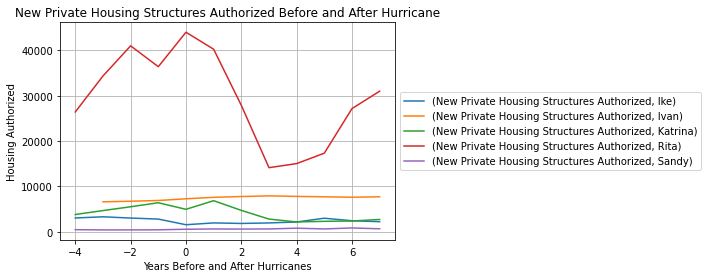

In [5]:
auth_merge_df.plot(x = 'Delta')
plt.title('New Private Housing Structures Authorized Before and After Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Housing Authorized')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/HousingAuthGraph.png')
